Dataset link: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

### Importing necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing CSV file

In [6]:
df = pd.read_csv('dataset.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [7]:
df['urine_protein'].unique()

array([1., 3., 2., 4., 5., 6.])

### Shape of dataframe

In [8]:
df.shape

(991346, 24)

### Checking for duplicate values

In [9]:
df.duplicated().sum()

26

### Dropping duplicate values

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(991320, 24)

### Checking for null values

In [12]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  float64
 8   hear_right        991320 non-null  float64
 9   SBP               991320 non-null  float64
 10  DBP               991320 non-null  float64
 11  BLDS              991320 non-null  float64
 12  tot_chole         991320 non-null  float64
 13  HDL_chole         991320 non-null  float64
 14  LDL_chole         991320 non-null  float64
 15  triglyceride      991320 non-null  float64
 16  hemoglobin        991320 

### Replacing 'Female' with 1 and 'Male' with 0 in sex column

In [14]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['sex'] = df['sex'].map({'Female':1,'Male':0})

In [16]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### Replacing 'Y' with 1 and 'N' with 0 in DRK_YN column

In [17]:
df['DRK_YN'] = df['DRK_YN'].map({"Y":1,"N":0})

In [18]:
import warnings
warnings.filterwarnings("ignore")

### Age Distribution

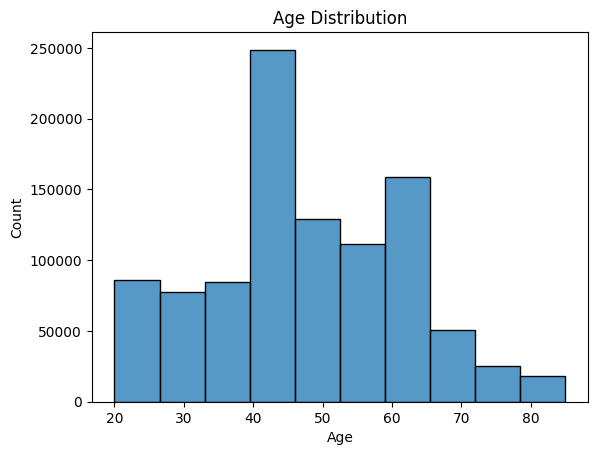

In [19]:
sns.histplot(data=df,x='age',bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Sex Distribution

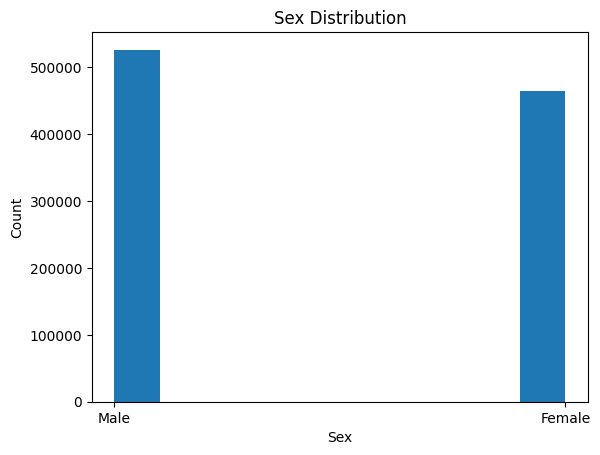

In [20]:
plt.hist(df['sex'],bins=10)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks([0,1], labels=['Male','Female'])
plt.show()

### Scatter plot between Height and Weight

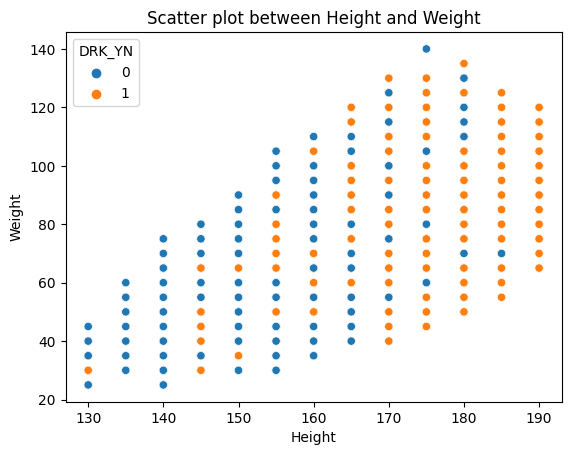

In [21]:
sns.scatterplot(data=df, x='height',y='weight',hue='DRK_YN')
plt.title("Scatter plot between Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

### Scatter plot between BMI and Waistline

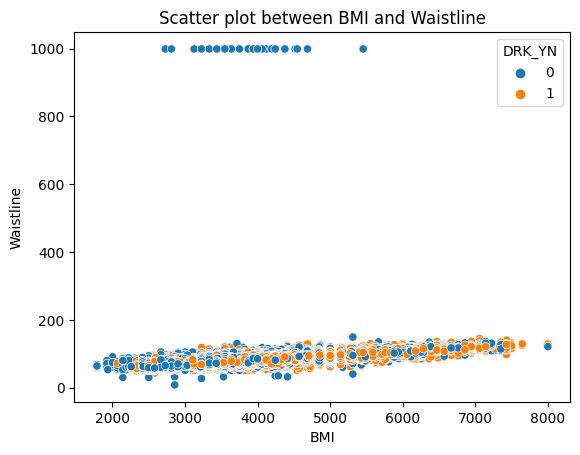

In [22]:
df['BMI'] = (df['weight']*10000)/df['height']
sns.scatterplot(data=df, x='BMI',y='waistline',hue='DRK_YN')
plt.title("Scatter plot between BMI and Waistline")
plt.xlabel("BMI")
plt.ylabel("Waistline")
plt.show()

### Scatter plot of Blood Pressure Distribution

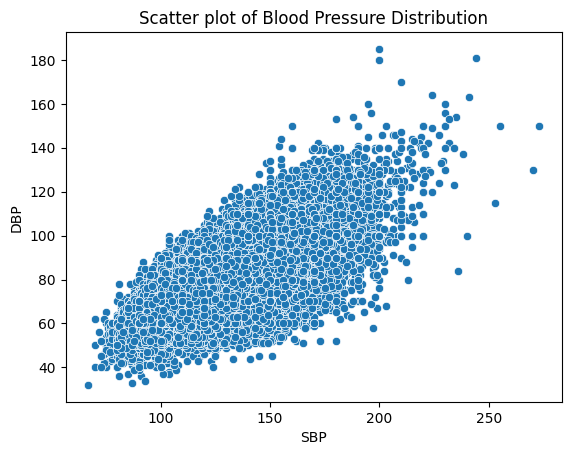

In [23]:
sns.scatterplot(data=df, x='SBP', y='DBP')
plt.title("Scatter plot of Blood Pressure Distribution")
plt.show()

### Line plot of Hemoglobin over Age

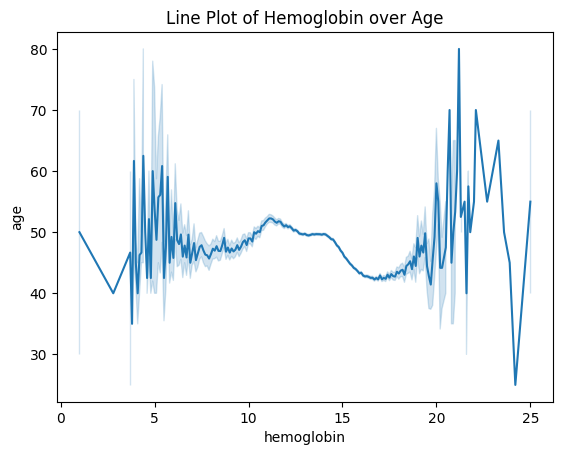

In [24]:
sns.lineplot(data=df, x='hemoglobin',y='age')
plt.title("Line Plot of Hemoglobin over Age")
plt.show()

### Line Plot of Cholestrol levels over Age

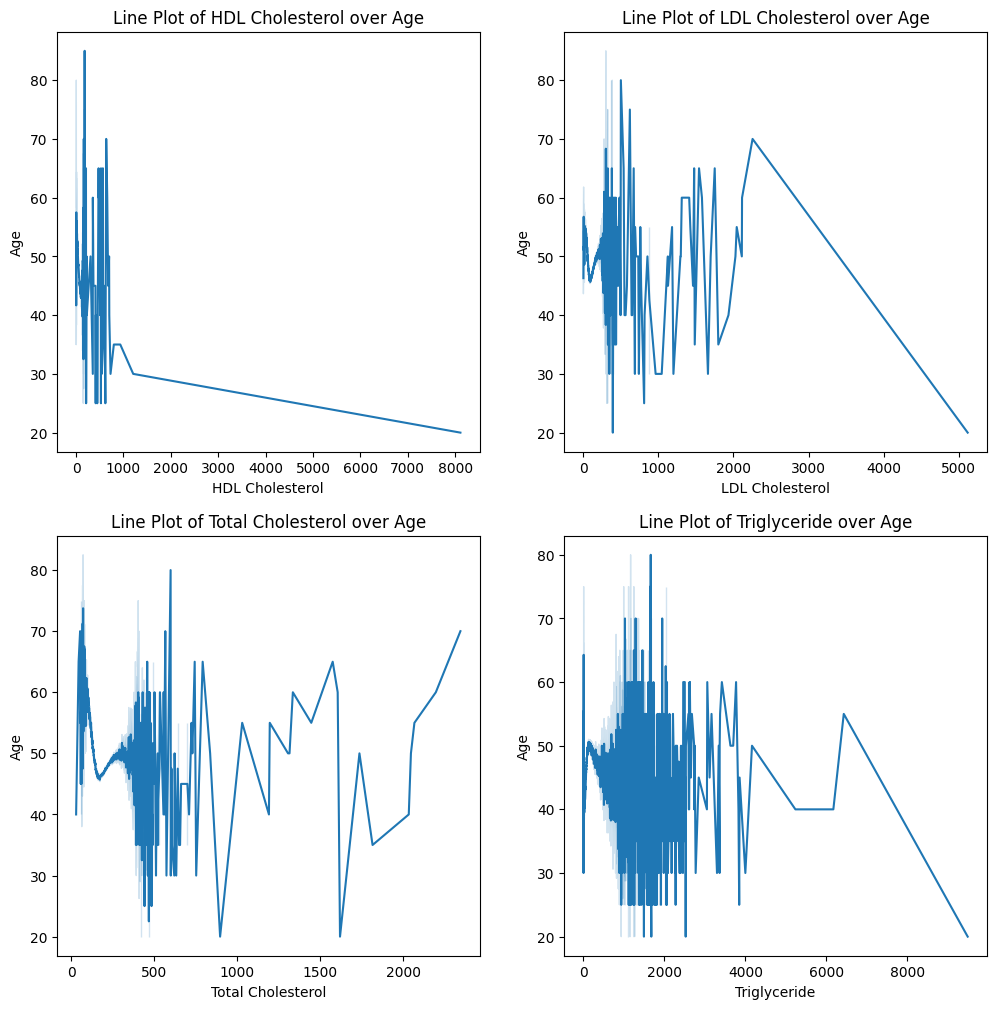

In [25]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

sns.lineplot(data=df, x='HDL_chole', y='age',ax=ax[0,0])
ax[0,0].set_title("Line Plot of HDL Cholesterol over Age")
ax[0,0].set_xlabel("HDL Cholesterol")
ax[0,0].set_ylabel("Age")

sns.lineplot(data=df, x='LDL_chole', y='age',ax=ax[0,1])
ax[0,1].set_title("Line Plot of LDL Cholesterol over Age")
ax[0,1].set_xlabel("LDL Cholesterol")
ax[0,1].set_ylabel("Age")

sns.lineplot(data=df, x='tot_chole', y='age',ax=ax[1,0])
ax[1,0].set_title("Line Plot of Total Cholesterol over Age")
ax[1,0].set_xlabel("Total Cholesterol")
ax[1,0].set_ylabel("Age")

sns.lineplot(data=df, x='triglyceride', y='age',ax=ax[1,1])
ax[1,1].set_title("Line Plot of Triglyceride over Age")
ax[1,1].set_xlabel("Triglyceride")
ax[1,1].set_ylabel("Age")
plt.show()

### Pie Chart of Smoking Status Distribution

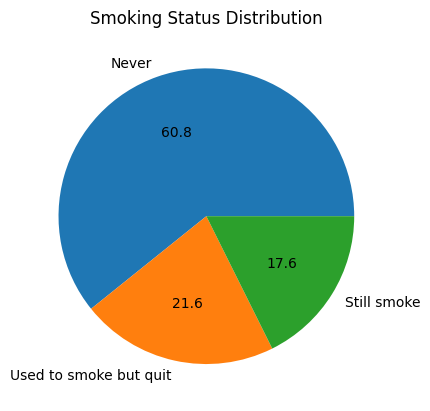

In [26]:
plt.pie(x=df['SMK_stat_type_cd'].value_counts(), labels=["Never", "Used to smoke but quit", "Still smoke"], autopct="%.1f")
plt.title("Smoking Status Distribution")
plt.show()

### Hearing and Sight Impairment by Sex

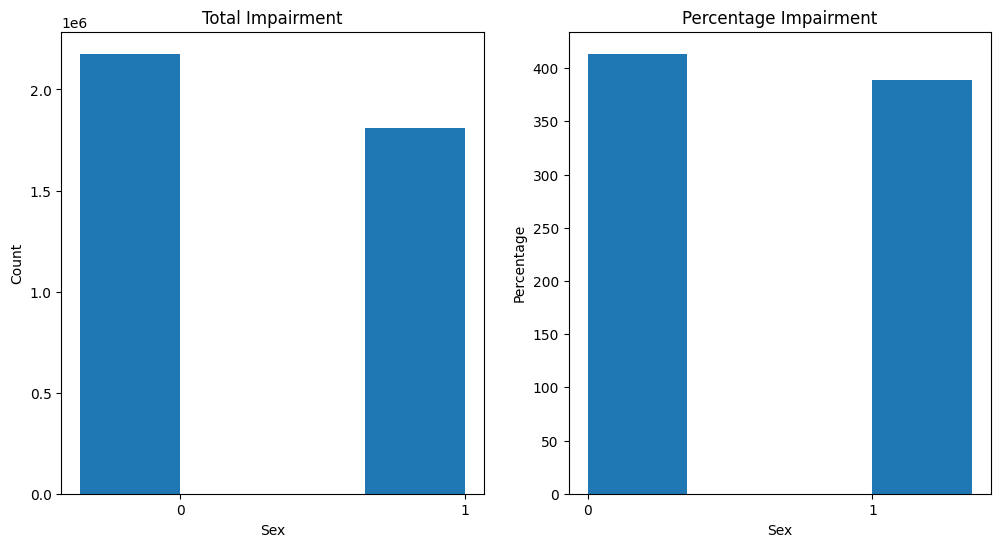

In [27]:
df['total_impairment'] = df['hear_left'] + df['hear_right'] + df['sight_left'] + df['sight_right']
df_grouped = df.groupby('sex')['total_impairment'].sum()
total_per_sex = df.groupby('sex').size()
percentage_impairment = (df_grouped / total_per_sex) * 100
fig, ax = plt.subplots(1,2,figsize=(12,6))
index = range(len(df_grouped))
bar_width = 0.35
ax[0].bar(index, df_grouped, bar_width)
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Count')
ax[0].set_title('Total Impairment')
ax[0].set_xticks([p + bar_width / 2 for p in index])
ax[0].set_xticklabels(df_grouped.index)
ax[1].bar([p + bar_width for p in index], percentage_impairment, bar_width)
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Percentage')
ax[1].set_title('Percentage Impairment')
ax[1].set_xticks([p + bar_width / 2 for p in index])
ax[1].set_xticklabels(df_grouped.index)
plt.show()

### Urine Protein Presence by Age Group

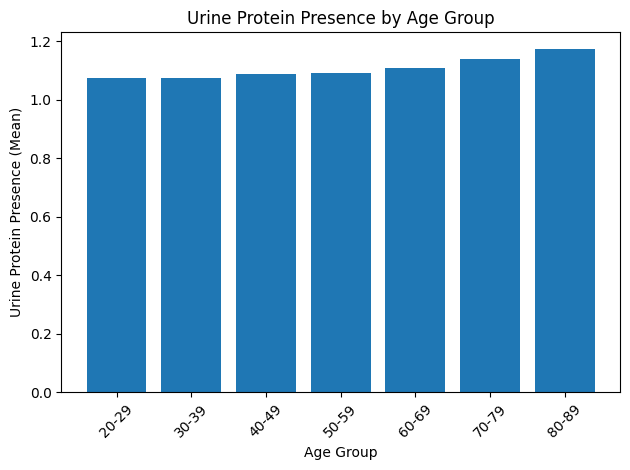

In [28]:
age_bins = [20,30,40,50,60,70,80,90]
age_labels = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89']
df['age_group'] = pd.cut(df['age'],bins=age_bins, labels=age_labels, right=False)
age_urine_protein = df.groupby('age_group')['urine_protein'].mean()
plt.bar(age_urine_protein.index, age_urine_protein.values)
plt.xlabel('Age Group')
plt.ylabel('Urine Protein Presence (Mean)')
plt.title('Urine Protein Presence by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cholesterol Components (HDL, LDL, Triglyceride) over Age

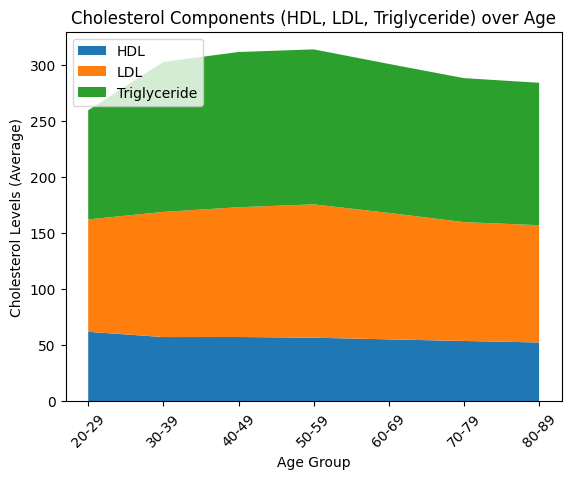

In [29]:
age_avg_cholesterol = df.groupby('age_group')[['HDL_chole', 'LDL_chole', 'triglyceride']].mean()
plt.stackplot(age_avg_cholesterol.index, age_avg_cholesterol.values.T, labels=['HDL', 'LDL', 'Triglyceride'])
plt.xlabel('Age Group')
plt.ylabel('Cholesterol Levels (Average)')
plt.title('Cholesterol Components (HDL, LDL, Triglyceride) over Age')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Violin plot of Distribution of Sight (Left and Right)

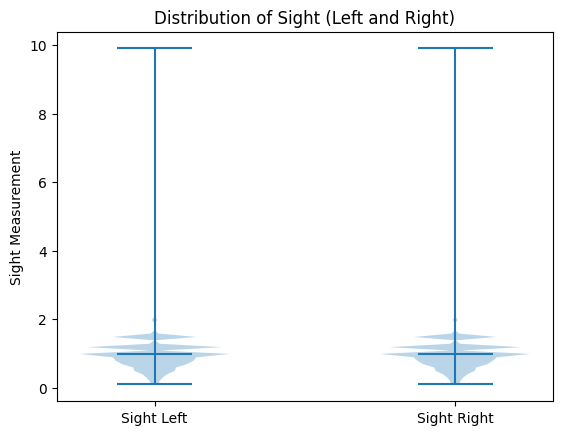

In [30]:
plt.violinplot([df['sight_left'], df['sight_right']], showmedians=True)
plt.xticks([1, 2], ['Sight Left', 'Sight Right'])
plt.ylabel('Sight Measurement')
plt.title('Distribution of Sight (Left and Right)')
plt.show()

### Correlation between Variables

In [31]:
df.drop(['age_group','BMI','total_impairment'],axis=1,inplace=True)

In [32]:
corr = df.corr()

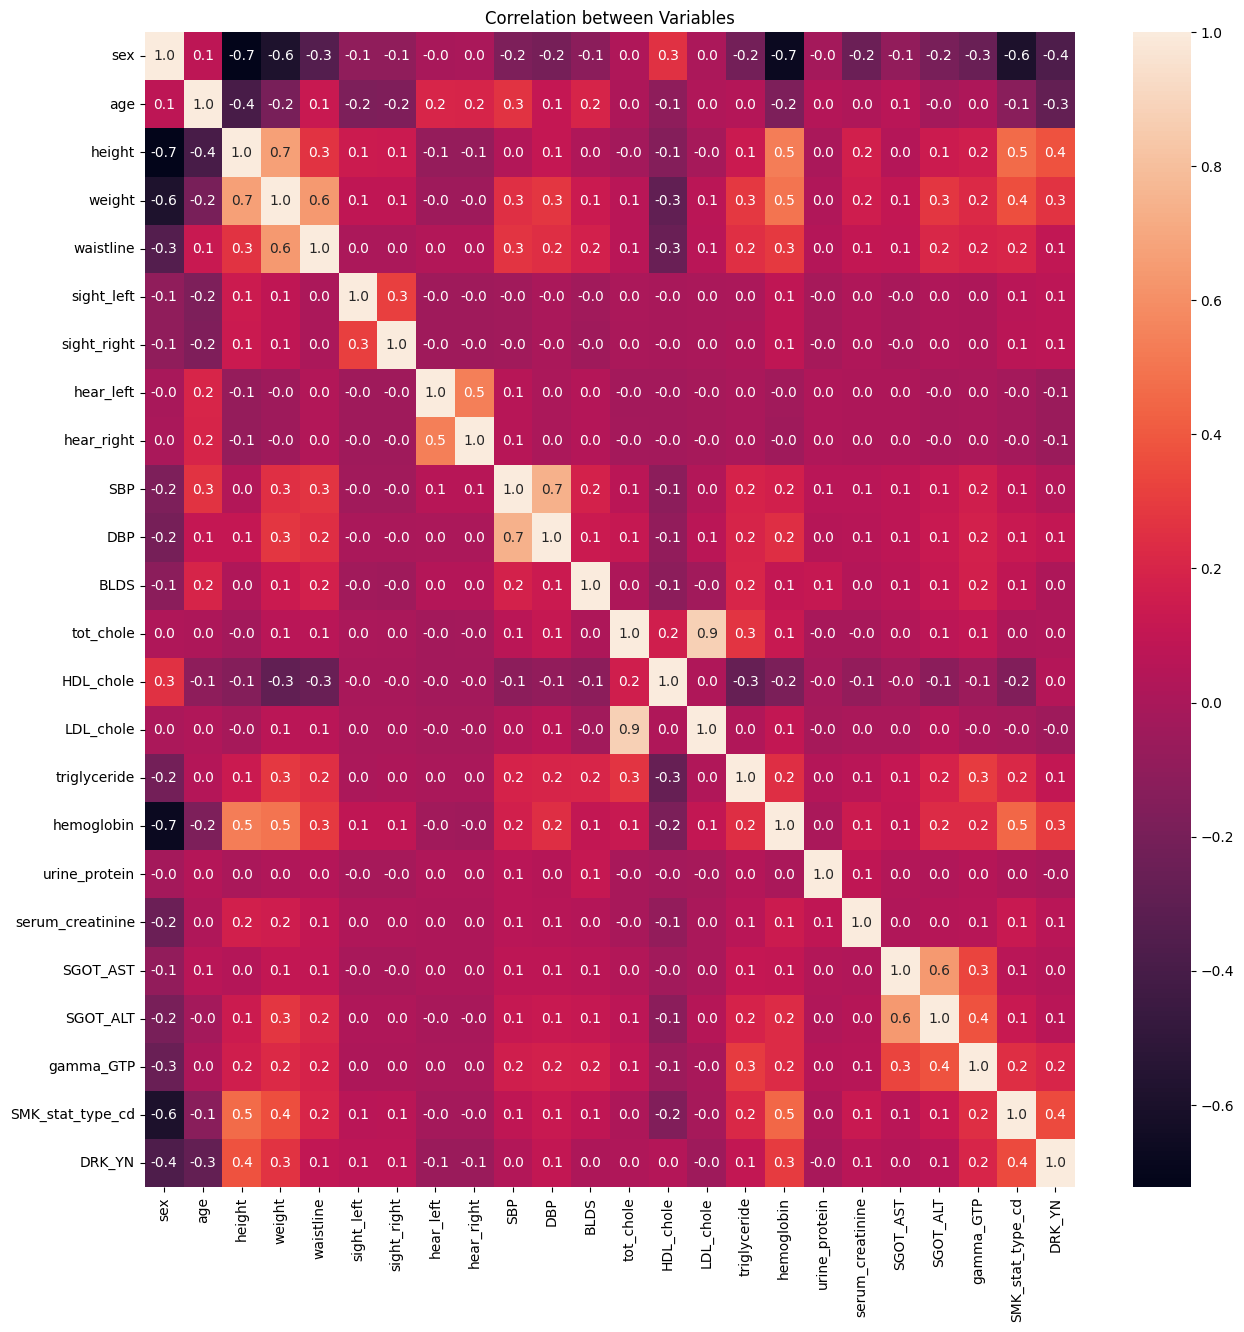

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,fmt=".1f")
plt.title("Correlation between Variables")
plt.show()

In [34]:
corr_y = corr['DRK_YN'].abs().sort_values(ascending=False)
corr_y

DRK_YN              1.000000
height              0.374560
sex                 0.368721
SMK_stat_type_cd    0.350782
hemoglobin          0.299342
age                 0.284586
weight              0.264282
gamma_GTP           0.205092
triglyceride        0.104394
DBP                 0.100872
waistline           0.092992
sight_left          0.077373
sight_right         0.074798
SGOT_ALT            0.062908
serum_creatinine    0.060797
hear_left           0.058338
hear_right          0.058238
LDL_chole           0.043689
HDL_chole           0.042516
SGOT_AST            0.039382
SBP                 0.033145
tot_chole           0.019724
BLDS                0.014712
urine_protein       0.003126
Name: DRK_YN, dtype: float64

### Independent Variables

In [35]:
X = df.drop('DRK_YN',axis=1)
X.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0


### Dependent Variables

In [36]:
y = df['DRK_YN']
y[:5]

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

### Checking is our dataset is imbalanced or not

In [37]:
y.value_counts()

DRK_YN
0    495844
1    495476
Name: count, dtype: int64

Our dataset is balanced.

### Splitting data into Training and testing test

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

### Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the model

### Using Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV()
log_reg.fit(X_train_scaled,y_train)

LogisticRegressionCV()

In [41]:
log_reg.score(X_test_scaled, y_test)

0.7259209942299156

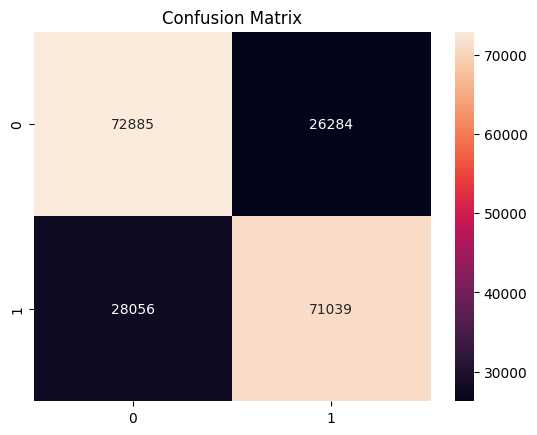

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = log_reg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='.0f')
plt.title("Confusion Matrix")
plt.show()

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73     99169
           1       0.73      0.72      0.72     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



### Using Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50,criterion="gini")
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.7298601864181092

In [45]:
y_pred = forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73     99169
           1       0.73      0.72      0.73     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



### Using Gradient Boosting Algorithm

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier()
grad.fit(X_train_scaled,y_train)
grad.score(X_test_scaled,y_test)

0.735302425049429

In [47]:
y_pred = grad.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     99169
           1       0.73      0.75      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



### Saving the model and the scaler

In [48]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(grad,f)

with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)